In [14]:
# IMPORTING DATA

import sys
sys.path.append('../')

from src.data_loader import PatentDataLoader
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load patent data
loader = PatentDataLoader("../data/patent_data_small")
patents = loader.load_all_patents()
df = loader.patents_to_dataframe(patents)

print(f"Loaded {len(df)} patents")
print(f"Columns: {df.columns.tolist()}")

INFO:src.data_loader:Loaded 10 patents from patents_ipa240905.json
INFO:src.data_loader:Loaded 10 patents from patents_ipa250417.json
INFO:src.data_loader:Loaded 10 patents from patents_ipa250102.json
INFO:src.data_loader:Loaded 10 patents from patents_ipa240801.json
INFO:src.data_loader:Loaded 10 patents from patents_ipa240704.json
INFO:src.data_loader:Loaded 10 patents from patents_ipa241031.json
INFO:src.data_loader:Loaded 10 patents from patents_ipa240620.json
INFO:src.data_loader:Loaded 10 patents from patents_ipa240509.json
INFO:src.data_loader:Loaded 10 patents from patents_ipa250227.json
INFO:src.data_loader:Loaded 10 patents from patents_ipa241226.json
INFO:src.data_loader:Loaded 10 patents from patents_ipa250123.json
INFO:src.data_loader:Loaded 10 patents from patents_ipa240725.json
INFO:src.data_loader:Loaded 10 patents from patents_ipa241114.json
INFO:src.data_loader:Loaded 10 patents from patents_ipa250206.json
INFO:src.data_loader:Loaded 10 patents from patents_ipa240314.

Loaded 640 patents
Columns: ['title', 'doc_number', 'filename', 'abstract', 'detailed_description', 'claims', 'bibtex', 'classification']


In [15]:
# ANALYSIS

if len(df) > 0:
    # Show first few patents
    display(df.head())
    
    # Data quality analysis
    analysis = loader.analyze_data_structure(patents)
    
    print("\nField Coverage:")
    for field, coverage in analysis['field_coverage'].items():
        print(f"{field}: {coverage:.1%}")

,title,doc_number,filename,abstract,detailed_description,claims,bibtex,classification
0,SAFETY BELT RETRACTOR PRE-WINDING AND BAFFLE I...,20240293901,US20240293901A1-20240905.XML,A safety belt retractor pre-winding and baffle...,[The following will give a clear and complete ...,[a winding mechanism ( the winding mechanism (...,"@patent{20240293901,\n title = {SAFETY BELT...",B60R2246FI
1,VEHICLE WHEEL COVER,20240294035,US20240294035A1-20240905.XML,A vehicle wheel cover is provided. The vehicle...,[The following described implementations may b...,[a base; a printed layer formed at a first loc...,"@patent{20240294035,\n title = {VEHICLE WHE...",B60B700FI
2,VEHICLE WHEEL COVER CASING AND A METHOD OF MAN...,20240294036,US20240294036A1-20240905.XML,A sleeve for covering vehicle wheels includes ...,[],"[1 .- 34 . (canceled), a fabric band having an...","@patent{20240294036,\n title = {VEHICLE WHE...",B60B1500FI
3,REMOVABLE WORK BOX CASTER,20240294037,US20240294037A1-20240905.XML,Removable work box casters for a job site work...,[FIG.1one shows a perspective view of a typica...,"[(a) an upper plate segment, a lower plate seg...","@patent{20240294037,\n title = {REMOVABLE W...",B60B3300FI
4,VEHICLE PNEUMATIC TYRE AND RUBBER MIXTURE FOR ...,20240294038,US20240294038A1-20240905.XML,A pneumatic vehicle tire in radial design that...,[],[wherein the tread is in the form of a single ...,"@patent{20240294038,\n title = {VEHICLE PNE...",B60C1103FI



Field Coverage:
bibtex: 100.0%
detailed_description: 100.0%
abstract: 100.0%
classification: 100.0%
claims: 100.0%
doc_number: 100.0%
title: 100.0%
filename: 100.0%


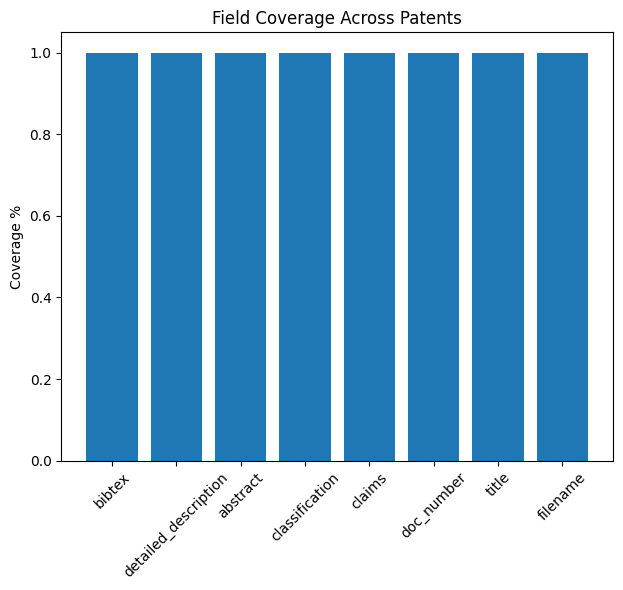

In [16]:
# DATA COVERAGE

if len(df) > 0:
    plt.figure(figsize=(12, 6))
    coverage_data = analysis['field_coverage']
    
    plt.subplot(1, 2, 1)
    plt.bar(range(len(coverage_data)), list(coverage_data.values()))
    plt.xticks(range(len(coverage_data)), list(coverage_data.keys()), rotation=45)
    plt.title('Field Coverage Across Patents')
    plt.ylabel('Coverage %')
    
    # Sample text lengths
    if 'Claims' in df.columns:
        plt.subplot(1, 2, 2)
        claim_lengths = df['Claims'].fillna('').str.len()
        plt.hist(claim_lengths, bins=50, edgecolor='black')
        plt.title('Distribution of Claims Text Length')
        plt.xlabel('Character Count')
        plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

In [17]:
# PATENT SAMPLES

if len(df) > 0 and 'title' in df.columns:
    print("Sample Patent Titles:")
    sample_titles = df['title'].dropna().head(10)
    for i, title in enumerate(sample_titles, 1):
        print(f"{i}. {title}")

Sample Patent Titles:
1. SAFETY BELT RETRACTOR PRE-WINDING AND BAFFLE INSTALLATION DEVICE
2. VEHICLE WHEEL COVER
3. VEHICLE WHEEL COVER CASING AND A METHOD OF MANUFACTURING A VEHICLE WHEEL COVER CASING
4. REMOVABLE WORK BOX CASTER
5. VEHICLE PNEUMATIC TYRE AND RUBBER MIXTURE FOR A TREAD
6. TIRE AND A MOULD FOR MANUFACTURING A TIRE
7. PNEUMATIC TIRE
8. MOBILE CARBON CAPTURE SYSTEM ENHANCEMENT
9. TIRE-REPAIRING CONNECTOR
10. TOW HITCH LEAD IN SYSTEM
